# Most Important Characters in the Great Gatsby

🏁 Use web scraping and NLP to find the most frequent words in one of the classic literature: The Great Gatsby by  F. Scott Fitzgerald.

<img src="https://images-na.ssl-images-amazon.com/images/I/81Zub4W4bXL.jpg">


In [1]:
# import libraries
import requests 
import nltk 
from bs4 import BeautifulSoup 
from collections import Counter 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# retrieve the data through html get request
r = requests.get('https://www.gutenberg.org/files/64317/64317-h/64317-h.htm')
r.encoding = 'utf-8'
html = r.text 

In [3]:
# convert the html data into a beautiful soup object 
soup = BeautifulSoup(html)
text = soup.text # gets the text of the beautiful soup object

In [4]:
# clean the text
text = text[3167:]

In [5]:
# use natural langauge toolkit to tokenize the data
tokenizer = nltk.tokenize.RegexpTokenizer("\w+")
tokens = tokenizer.tokenize(text)

In [6]:
# convert the tokenized output into lowercase
words = []

for token in tokens:
    words.append(token.lower())

In [7]:
# find the stop words using natural language toolkit

# download the stopwords package of nltk
# nltk.download('stopwords')

# sets the parameter for stopwords for the language english
stop_words = nltk.corpus.stopwords.words("english")

In [8]:
# clean the data by removing the stop words 
words_clean = []

for output in words:
    if output not in stop_words:
        words_clean.append(output)

In [9]:
# count and find the top 10 used words in the text
count = Counter(words_clean)
top_10_words = count.most_common(10)

print(top_10_words)

[('gatsby', 263), ('said', 235), ('tom', 191), ('daisy', 186), ('one', 154), ('like', 121), ('man', 113), ('back', 108), ('came', 106), ('little', 102)]


In [10]:
# find the name of characters from the top 10 words list
protagonists = ["Gatsby", "Tom", "Daisy"]

print(protagonists)

['Gatsby', 'Tom', 'Daisy']


Text(0.5, 1.0, 'Top Ten Words')

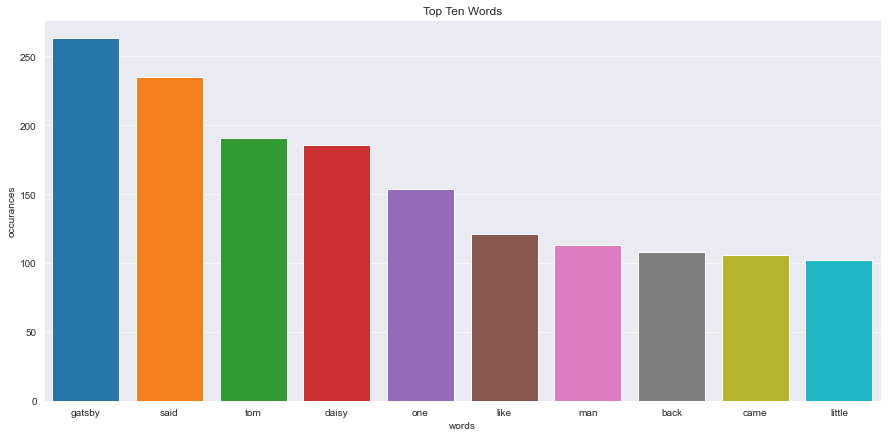

In [11]:
# visualize the top 10 words 
df = pd.DataFrame(top_10_words, columns = ['words', 'occurances'])
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
sns.barplot(x='words', y='occurances', data = df, saturation = 0.9).set_title('Top Ten Words')